## seaborn:线性回归绘图

内容介绍：线性回归可以帮助我们看清数据关系的趋势。可以通过regplot()和lmplot进行绘制。

* regplot()：x,y可以直接是数据或是字符串(即dataframe的列名)
* lmplot：x,y必须是字符串(即，dataframe的列名)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
#加载数据

In [3]:
# 网络加载官方案例数据
# tips = sns.load_dataset('tips')

#使用本地数据加载
df = pd.read_csv('seaborn-data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
#使用本地数据加载
df3 = pd.read_csv('seaborn-data/anscombe.csv')
df3.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


### 1.lmplot函数的使用方法

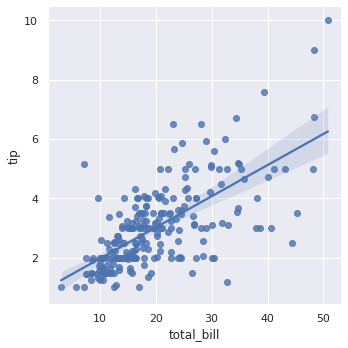

In [13]:
sns.set(color_codes=True)
sns.lmplot(x='total_bill', y='tip', data=df)

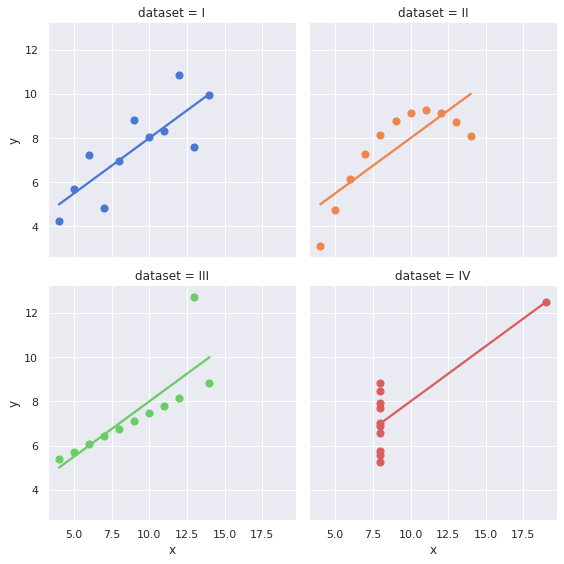

In [26]:
#将列数据中的四种情况全部绘出多个图形。
#col_wrap=2,表示分两行绘制。
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df3,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

### 2.regplot函数的使用方法

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

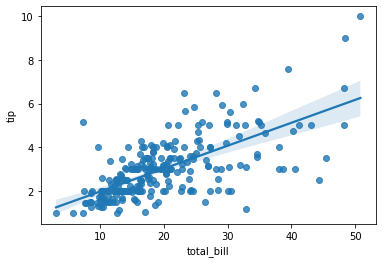

In [7]:
#regplot的参数与lmplot基本一致
#长宽与lmplot不一致
sns.regplot(x='total_bill', y='tip', data=df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

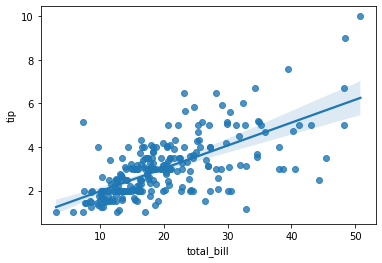

In [8]:
#data参数可以不传入，直接使用传给x,y参数的数据序列
sns.regplot(x=df['total_bill'], y=df['tip'])

### 3.其他参数的设置

In [27]:
df3.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


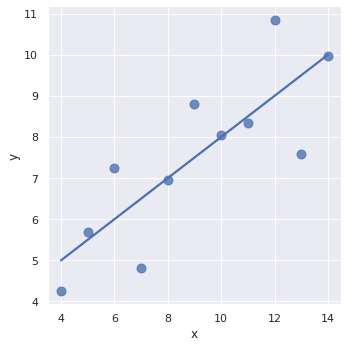

In [14]:
#(1)一般数据的回归分析
sns.lmplot(x='x',y='y',data=df3.query("dataset == 'I'"), ci=None, scatter_kws={'s': 80})

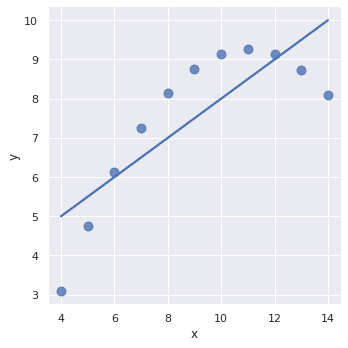

In [16]:
#(2)调整参数，使回归线和数据点相符
#当选取II数据时，筛选出的数据是曲线，而回归线却是直线
sns.lmplot(x='x',y='y',data=df3.query("dataset == 'II'"), ci=None, scatter_kws={'s': 80})

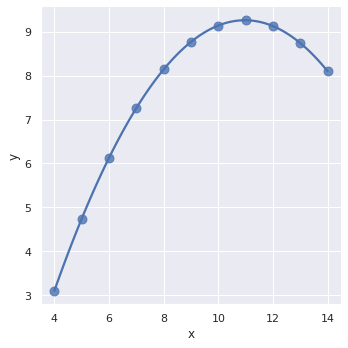

In [17]:
#筛选出的数据是曲线，而回归线却是直线,设置order=2(数据的平方)但不能大于4。
#order=2时，计算量较大，建议ci(置信区间)设置为none，计算会加快。
sns.lmplot(x='x',y='y',data=df3.query("dataset == 'II'"),order=2, ci=None, scatter_kws={'s': 80},)

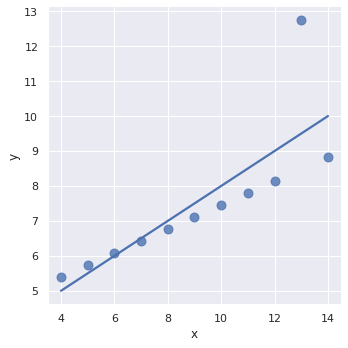

In [18]:
#(3)消除异群点
#回归时，存在个别异群点，可以设置robust=True参数消除
#不消除异群点时，回归的曲线会出现较大的偏离。
sns.lmplot(x='x',y='y',data=df3.query("dataset == 'III'"),ci=None, scatter_kws={'s': 80},)

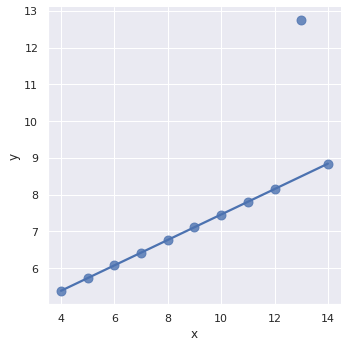

In [23]:
#robust=True, 参数设置后消除异群点
#robust参数的使用，依赖statsmodels包
sns.lmplot(x='x', y='y', data=df3.query("dataset == 'III'"), robust=True, ci=None, scatter_kws={'s': 80},)

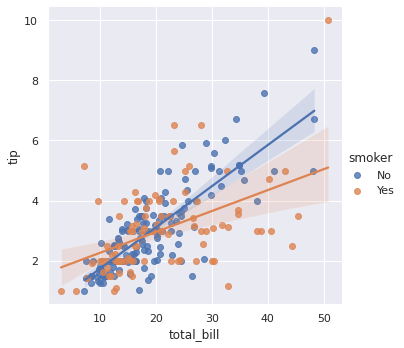

In [22]:
#(4)多列回归分析
#再添加一列数据进行回归分析
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=df)

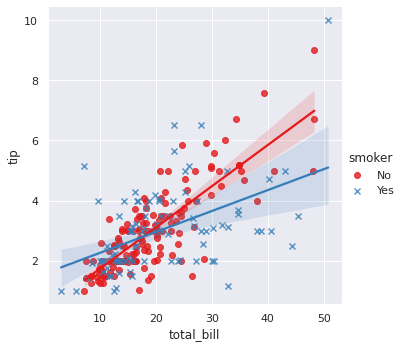

In [21]:
#再添加一列数据进行回归分析，对数据点标记markers
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=df, markers=['o', 'x'], palette='Set1')